## Script to plot results of heterochromatin localization study

In [1]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# specify directory to analyze
myDir=r'S:\ActiveUsers\Kasia\2019_Liu_forMacro\20190426\20190506-MSL\test\results'

Read all the data - original csv files contain measurements for each frame.

In [3]:
myFiles = [f for f in listdir(myDir) if ('nucleusSignal' in f)]

myData=pd.DataFrame()

for f in myFiles:
    
    myData_temp=pd.read_csv(join(myDir, f))
    myData_temp['file']=f
    myData_temp['total']=myData_temp.Area*myData_temp.Mean;
    myData_temp['localization']='nucleus'
    
    try:
        myData = pd.concat([myData,myData_temp],sort=False)
    except:
        myData = myData_temp.copy()
    
    # add euchromatin
    myData_temp=pd.read_csv(join(myDir, f.replace("nucleus", "euChrom")))
    myData_temp['file']=f
    myData_temp['total']=myData_temp.Area*myData_temp.Mean;
    myData_temp['localization']='eu'
    
    myData = pd.concat([myData,myData_temp],sort=False)
    
    # add heterochromatin
    myData_temp=pd.read_csv(join(myDir, f.replace("nucleus", "hetChrom")))
    myData_temp['file']=f
    myData_temp['total']=myData_temp.Area*myData_temp.Mean;
    myData_temp['localization']='het'
    
    myData = pd.concat([myData,myData_temp],sort=False)
    

Summarize data for each cell and then calculate ratios.

In [4]:
myData_cells=myData.groupby(['file','localization'], as_index=False).sum()

In [5]:
myData_cells

,file,localization,Area,Mean,StdDev,Mode,Slice,total
0,10_09-8M-E4(DOWN).czi_nucleusSignal.csv,eu,474845,4827.967,1911.089,4050.453,784,8.034556e+07
1,10_09-8M-E4(DOWN).czi_nucleusSignal.csv,het,11280,4511.640,1412.628,3537.451,495,2.435605e+06
2,10_09-8M-E4(DOWN).czi_nucleusSignal.csv,nucleus,486125,4842.968,1909.141,4068.100,784,8.278120e+07
3,10_09-8M-ES1.czi_nucleusSignal.csv,eu,598983,8797.077,3721.093,7739.338,775,1.885035e+08
4,10_09-8M-ES1.czi_nucleusSignal.csv,het,14993,11261.303,3711.780,9425.096,625,7.178897e+06
5,10_09-8M-ES1.czi_nucleusSignal.csv,nucleus,613976,8871.030,3755.807,7784.725,775,1.956823e+08
6,10_E2_nucleusSignal.csv,eu,557374,5042.612,2506.231,4081.665,675,1.023977e+08
7,10_E2_nucleusSignal.csv,het,7223,4653.525,1542.765,3708.671,506,1.531497e+06
8,10_E2_nucleusSignal.csv,nucleus,564597,5046.916,2499.078,4113.269,675,1.039293e+08
9,10_L2.czi_nucleusSignal.csv,eu,583219,9449.089,4216.124,7814.651,540,2.164092e+08


In [6]:
def group_norm(group):
    # find norm factors/group
    area_norm_factor=np.array(group.loc[group.localization=='nucleus','Area'])[0]
    signal_norm_factor=np.array(group.loc[group.localization=='nucleus','total'])[0]
    #modify dataframe
    group['volume_norm']=group.Area/area_norm_factor
    group['signal_norm']=group.total/signal_norm_factor
    return group

In [7]:
myData_cells=myData_cells.groupby(['file'],as_index=False).apply(group_norm)

In [8]:
myData_cells

,file,localization,Area,Mean,StdDev,Mode,Slice,total,volume_norm,signal_norm
0,10_09-8M-E4(DOWN).czi_nucleusSignal.csv,eu,474845,4827.967,1911.089,4050.453,784,8.034556e+07,0.976796,0.970577
1,10_09-8M-E4(DOWN).czi_nucleusSignal.csv,het,11280,4511.640,1412.628,3537.451,495,2.435605e+06,0.023204,0.029422
2,10_09-8M-E4(DOWN).czi_nucleusSignal.csv,nucleus,486125,4842.968,1909.141,4068.100,784,8.278120e+07,1.000000,1.000000
3,10_09-8M-ES1.czi_nucleusSignal.csv,eu,598983,8797.077,3721.093,7739.338,775,1.885035e+08,0.975580,0.963314
4,10_09-8M-ES1.czi_nucleusSignal.csv,het,14993,11261.303,3711.780,9425.096,625,7.178897e+06,0.024420,0.036686
5,10_09-8M-ES1.czi_nucleusSignal.csv,nucleus,613976,8871.030,3755.807,7784.725,775,1.956823e+08,1.000000,1.000000
6,10_E2_nucleusSignal.csv,eu,557374,5042.612,2506.231,4081.665,675,1.023977e+08,0.987207,0.985264
7,10_E2_nucleusSignal.csv,het,7223,4653.525,1542.765,3708.671,506,1.531497e+06,0.012793,0.014736
8,10_E2_nucleusSignal.csv,nucleus,564597,5046.916,2499.078,4113.269,675,1.039293e+08,1.000000,1.000000
9,10_L2.czi_nucleusSignal.csv,eu,583219,9449.089,4216.124,7814.651,540,2.164092e+08,0.979305,0.973276


### Plots

Volume of heterochromatin vs euchromatin.

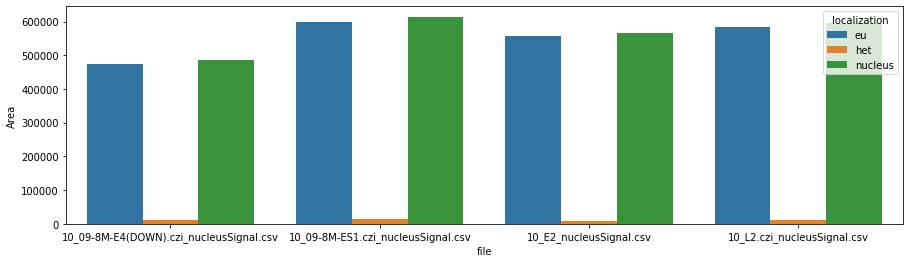

In [9]:
plt.figure(figsize=(15,4))
sns.barplot(x="file", y="Area", hue="localization", data=myData_cells)

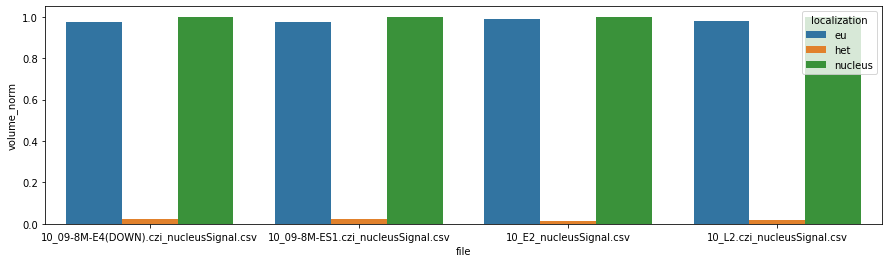

In [10]:
plt.figure(figsize=(15,4))
sns.barplot(x="file", y="volume_norm", hue="localization", data=myData_cells)

Plot total signal in different structures.

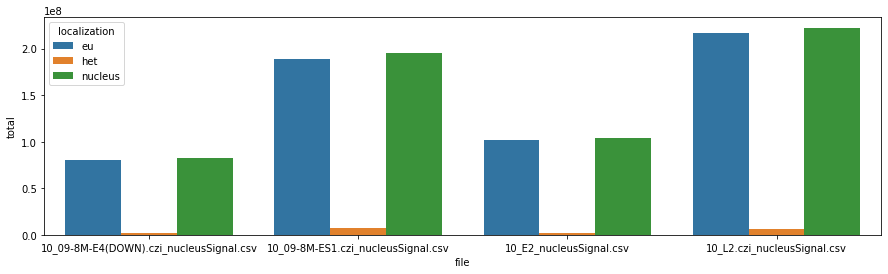

In [11]:
plt.figure(figsize=(15,4))
sns.barplot(x="file", y="total", hue="localization", data=myData_cells)

Plot ratios in different chromatin structures.

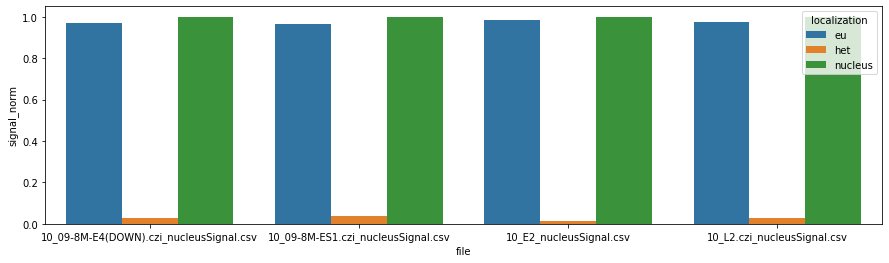

In [12]:
plt.figure(figsize=(15,4))
sns.barplot(x="file", y="signal_norm", hue="localization", data=myData_cells)